In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("mlb_teams.csv")

In [5]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [6]:
#X = df.drop(['TeamName','Playoffs',], axis=1)
X = df.drop(['TeamName','Playoffs','W-L%','W', 'L','WAR'], axis=1)
Y = df['Playoffs']
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

In [7]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [8]:
seed = 7
scoring = 'accuracy'

results = []
names = []
results_mean_dict = {}

# evaluate each model in turn
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    results_mean_dict[name] = cv_results.mean()
    print(msg)

/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

LR: 0.672874 (0.076347)
LDA: 0.857011 (0.044704)
KNN: 0.605517 (0.077983)
CART: 0.789195 (0.024691)
RF: 0.830345 (0.063801)
NB: 0.680230 (0.055945)
SVM: 0.672874 (0.076347)


/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/devinmoya/anaconda/lib/python3.6/site-p

In [9]:
results

[array([0.73333333, 0.7       , 0.62068966, 0.55172414, 0.75862069]),
 array([0.93333333, 0.8       , 0.82758621, 0.86206897, 0.86206897]),
 array([0.5       , 0.7       , 0.68965517, 0.55172414, 0.5862069 ]),
 array([0.8       , 0.76666667, 0.82758621, 0.79310345, 0.75862069]),
 array([0.83333333, 0.76666667, 0.93103448, 0.75862069, 0.86206897]),
 array([0.7       , 0.66666667, 0.75862069, 0.5862069 , 0.68965517]),
 array([0.73333333, 0.7       , 0.62068966, 0.55172414, 0.75862069])]

In [10]:
results_mean_dict

{'LR': 0.6728735632183908,
 'LDA': 0.8570114942528735,
 'KNN': 0.6055172413793104,
 'CART': 0.7891954022988505,
 'RF': 0.8303448275862069,
 'NB': 0.6802298850574713,
 'SVM': 0.6728735632183908}

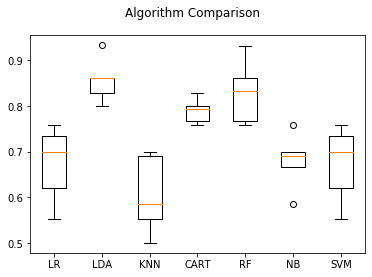

In [11]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8412698412698413
[[42  1]
 [ 9 11]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        43
           1       0.92      0.55      0.69        20

    accuracy                           0.84        63
   macro avg       0.87      0.76      0.79        63
weighted avg       0.85      0.84      0.83        63



/Users/devinmoya/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
rf.feature_importances_

array([0.18888369, 0.04295802, 0.01977065, 0.00201604, 0.00196708,
       0.0244803 , 0.10118514, 0.07029829, 0.0065985 , 0.03776891,
       0.05857521, 0.07691947, 0.08507892, 0.01601299, 0.09532284,
       0.0202499 , 0.04142809, 0.01089026, 0.04211304, 0.        ,
       0.01043238, 0.01778525, 0.02926503])

In [14]:
feature_dict = dict(list(zip(X_validation.columns,np.round(rf.feature_importances_, 4))))

In [15]:
{k: v for k, v in sorted(feature_dict.items(), key=lambda item: item[1],reverse=True)}

{'RA/G': 0.1889,
 'H': 0.1012,
 'RBI': 0.0953,
 'R': 0.0851,
 'R/G': 0.0769,
 'ER': 0.0703,
 'SO': 0.0586,
 'DefEff': 0.043,
 'OBP': 0.0421,
 'SO 1': 0.0414,
 'BB': 0.0378,
 'salary': 0.0293,
 'tSho': 0.0245,
 'SB': 0.0202,
 'E': 0.0198,
 'LOB': 0.0178,
 'H 1': 0.016,
 'BA': 0.0109,
 'GDP': 0.0104,
 'HR': 0.0066,
 'DP': 0.002,
 'ERA': 0.002,
 'SLG': 0.0}

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[38  5]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.76      0.80      0.78        20

    accuracy                           0.86        63
   macro avg       0.83      0.84      0.84        63
weighted avg       0.86      0.86      0.86        63

